# Towards a Conflict Heuristic (DH 2023)

## 10. Corpus Graphs Top Percentage

Last updated: 10.07.2023

julian.haeussler[at]tu-darmstadt.de

In [1]:
# imports

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# load dataframe

df_novel_ranking = pd.read_csv('..//Analyseergebnisse//230425_df_novel_ranking_romanticism_realism_naturalism_WSETS.csv', index_col=0)

In [3]:
df_novel_ranking.head()

,novel,year,A_adj_abs,A_adj_rel,A_noun_abs,A_noun_rel,B_adj_abs,B_adj_rel,B_noun_abs,B_noun_rel,...,aro_noun_bottom_abs,aro_noun_bottom_rel,conf_dorn_top_abs,conf_dorn_top_rel,conf_dorn_bottom_abs,conf_dorn_bottom_rel,conf_anno_top_abs,conf_anno_top_rel,conf_anno_bottom_abs,conf_anno_bottom_rel
0,"Arnim_Achim_von_Armut,_Reichtum,_Schuld_und_Bu...",1810,2163,0.122877,306,0.017383,27,0.001534,31,0.001761,...,1807,0.102653,312,0.017724,3811,0.216497,64,0.003636,8734,0.496165
1,Arnim_Achim_von_Die_Kronenwaechter_Erster_Band,1817,974,0.088877,132,0.012045,24,0.002190,20,0.001825,...,1308,0.119354,298,0.027192,1658,0.151291,76,0.006935,4571,0.417100
2,Arnim_Achim_von_Die_Kronenwaechter_Zweiter_Band,1812,887,0.089578,147,0.014845,24,0.002424,21,0.002121,...,1193,0.120481,351,0.035447,1484,0.149869,88,0.008887,3655,0.369117
3,Arnim_Achim_von_Hollins_Liebeleben,1802,441,0.159378,37,0.013372,3,0.001084,7,0.002530,...,249,0.089989,81,0.029274,578,0.208890,8,0.002891,1466,0.529816
4,Brentano_Clemens_Godwi_oder_Das_steinerne_Bild...,1802,1845,0.122283,350,0.023197,24,0.001591,48,0.003181,...,1310,0.086824,219,0.014515,3758,0.249072,50,0.003314,8143,0.539700


In [4]:
# correct dates

df_novel_ranking.at[1,'year'] = 1812 # Arnim_Achim_von_Die_Kronenwaechter_Erster_Band
df_novel_ranking.at[2,'year'] = 1817 # Arnim_Achim_von_Die_Kronenwaechter_Zweiter_Ban

df_novel_ranking.at[10,'year'] = 1795 # Hoelderlin_Friedrich_Hyperions_Jugend
df_novel_ranking.at[11,'year'] = 1797 # Hoelderlin_Friedrich_Hyperion_oder_der_Eremit_in_Griechenland

In [5]:
# define coefficients

# conflict coefficient

# =(A_adj_rel+B_adj_rel)*conf_dorn_top_rel*conf_anno_top_rel*1000

# =(A_noun_rel+B_noun_rel)*conf_dorn_top_rel*conf_anno_top_rel*1000

# harmony coefficient

# (C_adj_rel+D_adj_rel+)*conf_dorn_bottom_rel*conf_anno_bottom_rel*1000

# (C_adj_rel+D_adj_rel+)*conf_dorn_bottom_rel*conf_anno_bottom_rel*1000

In [6]:
# add columns conflict coefficient

df_novel_ranking['conf_coefficient_adj'] = 0

df_novel_ranking['conf_coefficient_noun'] = 0

In [7]:
# fill column conflict coefficient

for index,row in df_novel_ranking.iterrows():
    value = ((df_novel_ranking.at[index,'A_adj_rel']+df_novel_ranking.at[index,'B_adj_rel'])
             *df_novel_ranking.at[index,'conf_dorn_top_rel']*df_novel_ranking.at[index,'conf_anno_top_rel']*1000)
    df_novel_ranking.at[index,'conf_coefficient_adj'] = value

In [8]:
for index,row in df_novel_ranking.iterrows():
    value = ((df_novel_ranking.at[index,'A_noun_rel']+df_novel_ranking.at[index,'B_noun_rel'])
             *df_novel_ranking.at[index,'conf_dorn_top_rel']*df_novel_ranking.at[index,'conf_anno_top_rel']*1000)
    df_novel_ranking.at[index,'conf_coefficient_noun'] = value

In [9]:
# add columns harmony coefficient

df_novel_ranking['harmony_coefficient_adj'] = 0

df_novel_ranking['harmony_coefficient_noun'] = 0

In [10]:
for index,row in df_novel_ranking.iterrows():
    value = ((df_novel_ranking.at[index,'C_adj_rel']+df_novel_ranking.at[index,'D_adj_rel'])
             *df_novel_ranking.at[index,'conf_dorn_bottom_rel']*df_novel_ranking.at[index,'conf_anno_bottom_rel']*1000)
    df_novel_ranking.at[index,'harmony_coefficient_adj'] = value

In [11]:
for index,row in df_novel_ranking.iterrows():
    value = ((df_novel_ranking.at[index,'C_noun_rel']+df_novel_ranking.at[index,'D_noun_rel'])
             *df_novel_ranking.at[index,'conf_dorn_bottom_rel']*df_novel_ranking.at[index,'conf_anno_bottom_rel']*1000)
    df_novel_ranking.at[index,'harmony_coefficient_noun'] = value

In [12]:
df_novel_ranking.head()

,novel,year,A_adj_abs,A_adj_rel,A_noun_abs,A_noun_rel,B_adj_abs,B_adj_rel,B_noun_abs,B_noun_rel,...,conf_dorn_bottom_abs,conf_dorn_bottom_rel,conf_anno_top_abs,conf_anno_top_rel,conf_anno_bottom_abs,conf_anno_bottom_rel,conf_coefficient_adj,conf_coefficient_noun,harmony_coefficient_adj,harmony_coefficient_noun
0,"Arnim_Achim_von_Armut,_Reichtum,_Schuld_und_Bu...",1810,2163,0.122877,306,0.017383,27,0.001534,31,0.001761,...,3811,0.216497,64,0.003636,8734,0.496165,0.008017,0.001234,0.524796,6.230427
1,Arnim_Achim_von_Die_Kronenwaechter_Erster_Band,1812,974,0.088877,132,0.012045,24,0.002190,20,0.001825,...,1658,0.151291,76,0.006935,4571,0.417100,0.017173,0.002616,0.276391,4.105561
2,Arnim_Achim_von_Die_Kronenwaechter_Zweiter_Band,1817,887,0.089578,147,0.014845,24,0.002424,21,0.002121,...,1484,0.149869,88,0.008887,3655,0.369117,0.028983,0.005345,0.262573,3.681611
3,Arnim_Achim_von_Hollins_Liebeleben,1802,441,0.159378,37,0.013372,3,0.001084,7,0.002530,...,578,0.208890,8,0.002891,1466,0.529816,0.013581,0.001346,0.599965,6.479617
4,Brentano_Clemens_Godwi_oder_Das_steinerne_Bild...,1802,1845,0.122283,350,0.023197,24,0.001591,48,0.003181,...,3758,0.249072,50,0.003314,8143,0.539700,0.005958,0.001269,1.051304,6.690924


In [13]:
# create conflict coefficient graph Romantik + Realismus/Naturalismus

df_novel_ranking_Romantik = df_novel_ranking.head(26).copy()

df_novel_ranking_Realismus_Naturalismus = df_novel_ranking.tail(102).copy()

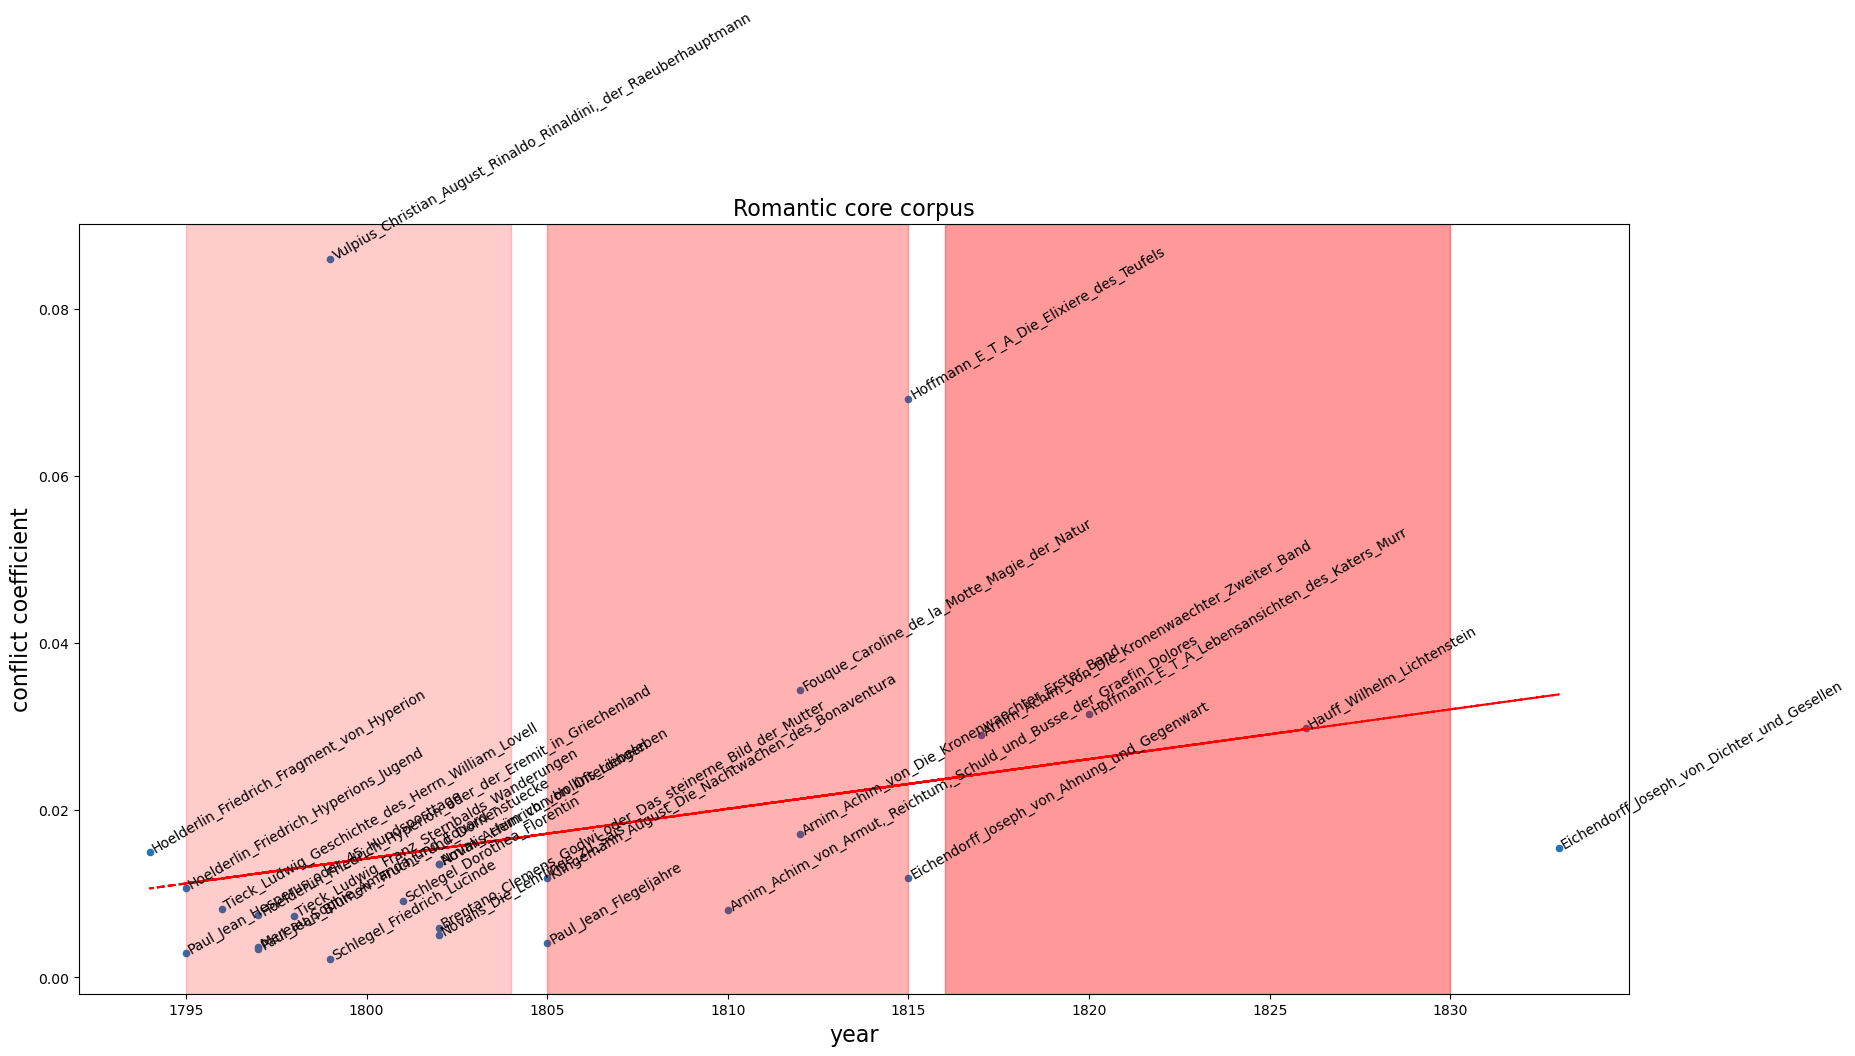

In [16]:
# plot conflict coefficient adjectives

fig, ax = plt.subplots()
df_novel_ranking_Romantik.plot(x='year', y='conf_coefficient_adj', kind='scatter', ax=ax)
plt.rcParams["figure.figsize"] = [20, 10]

for idx, row in df_novel_ranking_Romantik.iterrows():
    ax.annotate(row['novel'], (row['year'], row['conf_coefficient_adj']),rotation=30)

x = df_novel_ranking_Romantik['year']
y = df_novel_ranking_Romantik['conf_coefficient_adj']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlabel('year', fontsize=16)
plt.ylabel('conflict coefficient', fontsize=16)

ax.axvspan(1795, 1804, alpha=0.2, color='red')
ax.axvspan(1805, 1815, alpha=0.3, color='red')
ax.axvspan(1816, 1830, alpha=0.4, color='red')

plt.title('Romantic core corpus', fontsize=16)

plt.show()

fig.savefig('../Analyseergebnisse/png/conflict_heuristic_DH_Romantik_core_conf_coefficient_adj.png', dpi=300, bbox_inches = 'tight')

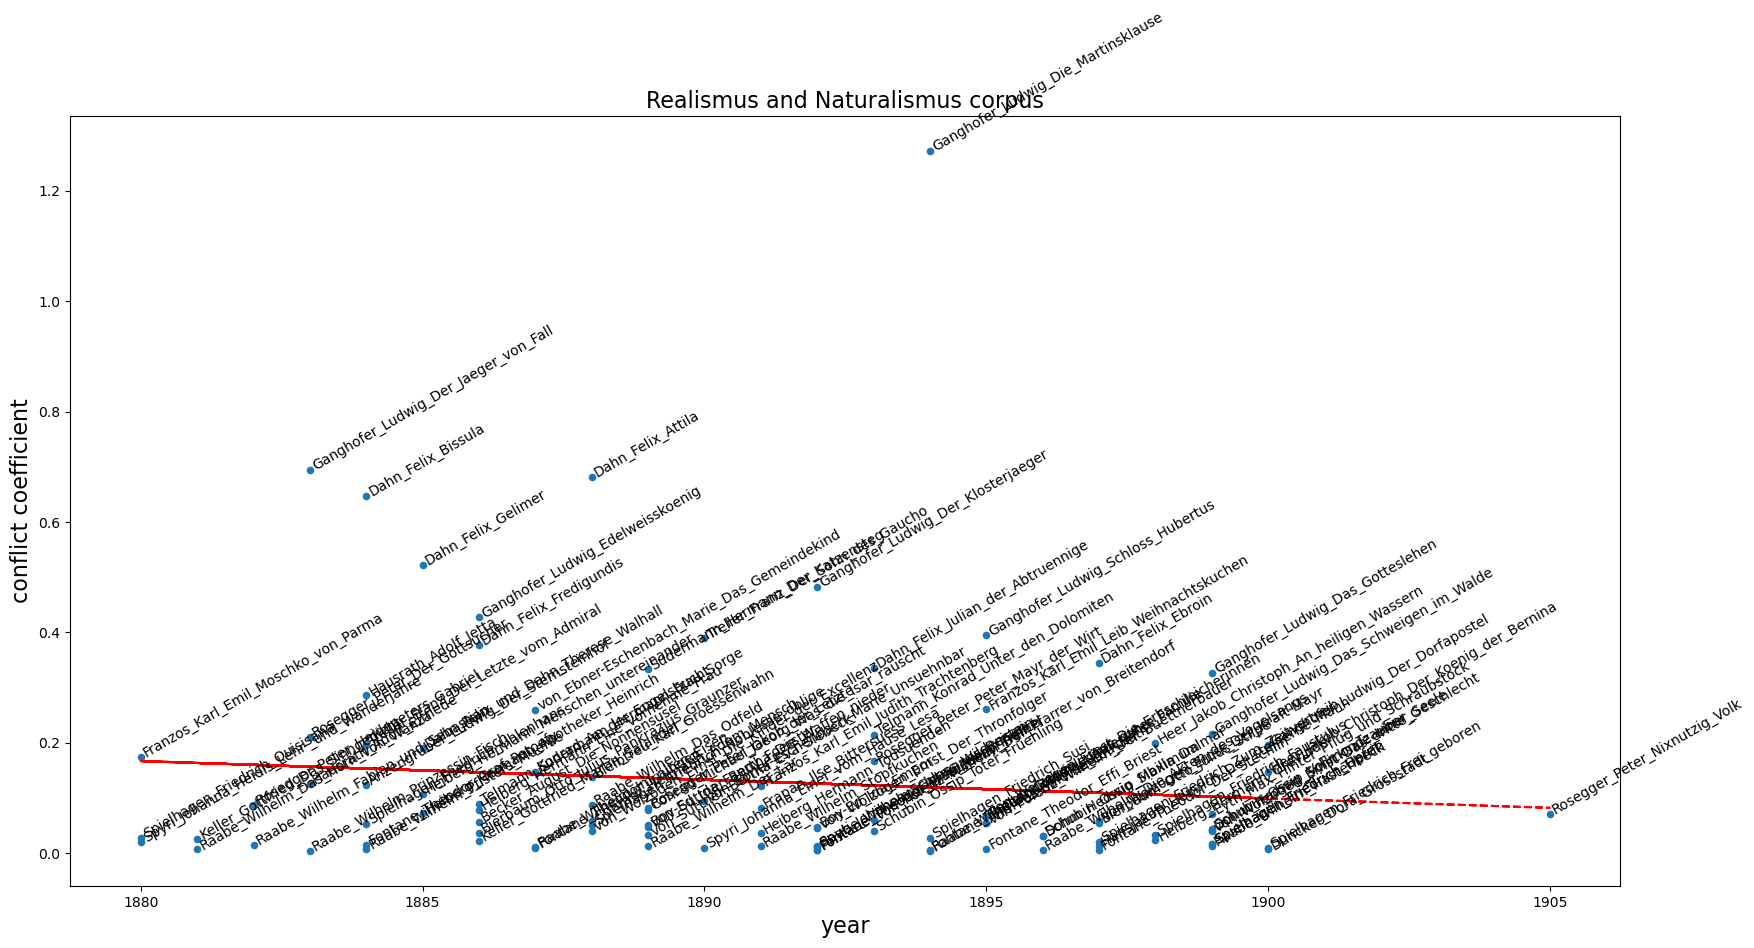

In [17]:
fig, ax = plt.subplots()
df_novel_ranking_Realismus_Naturalismus.plot(x='year', y='conf_coefficient_adj', kind='scatter', ax=ax)
plt.rcParams["figure.figsize"] = [20, 10]

for idx, row in df_novel_ranking_Realismus_Naturalismus.iterrows():
    ax.annotate(row['novel'], (row['year'], row['conf_coefficient_adj']),rotation=30)

x = df_novel_ranking_Realismus_Naturalismus['year']
y = df_novel_ranking_Realismus_Naturalismus['conf_coefficient_adj']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlabel('year', fontsize=16)
plt.ylabel('conflict coefficient', fontsize=16)

plt.title('Realismus and Naturalismus corpus', fontsize=16)

plt.show()

fig.savefig('../Analyseergebnisse/png/conflict_heuristic_DH_Realismus_Naturalismus_conf_coefficient_adj.png', dpi=300, bbox_inches = 'tight')

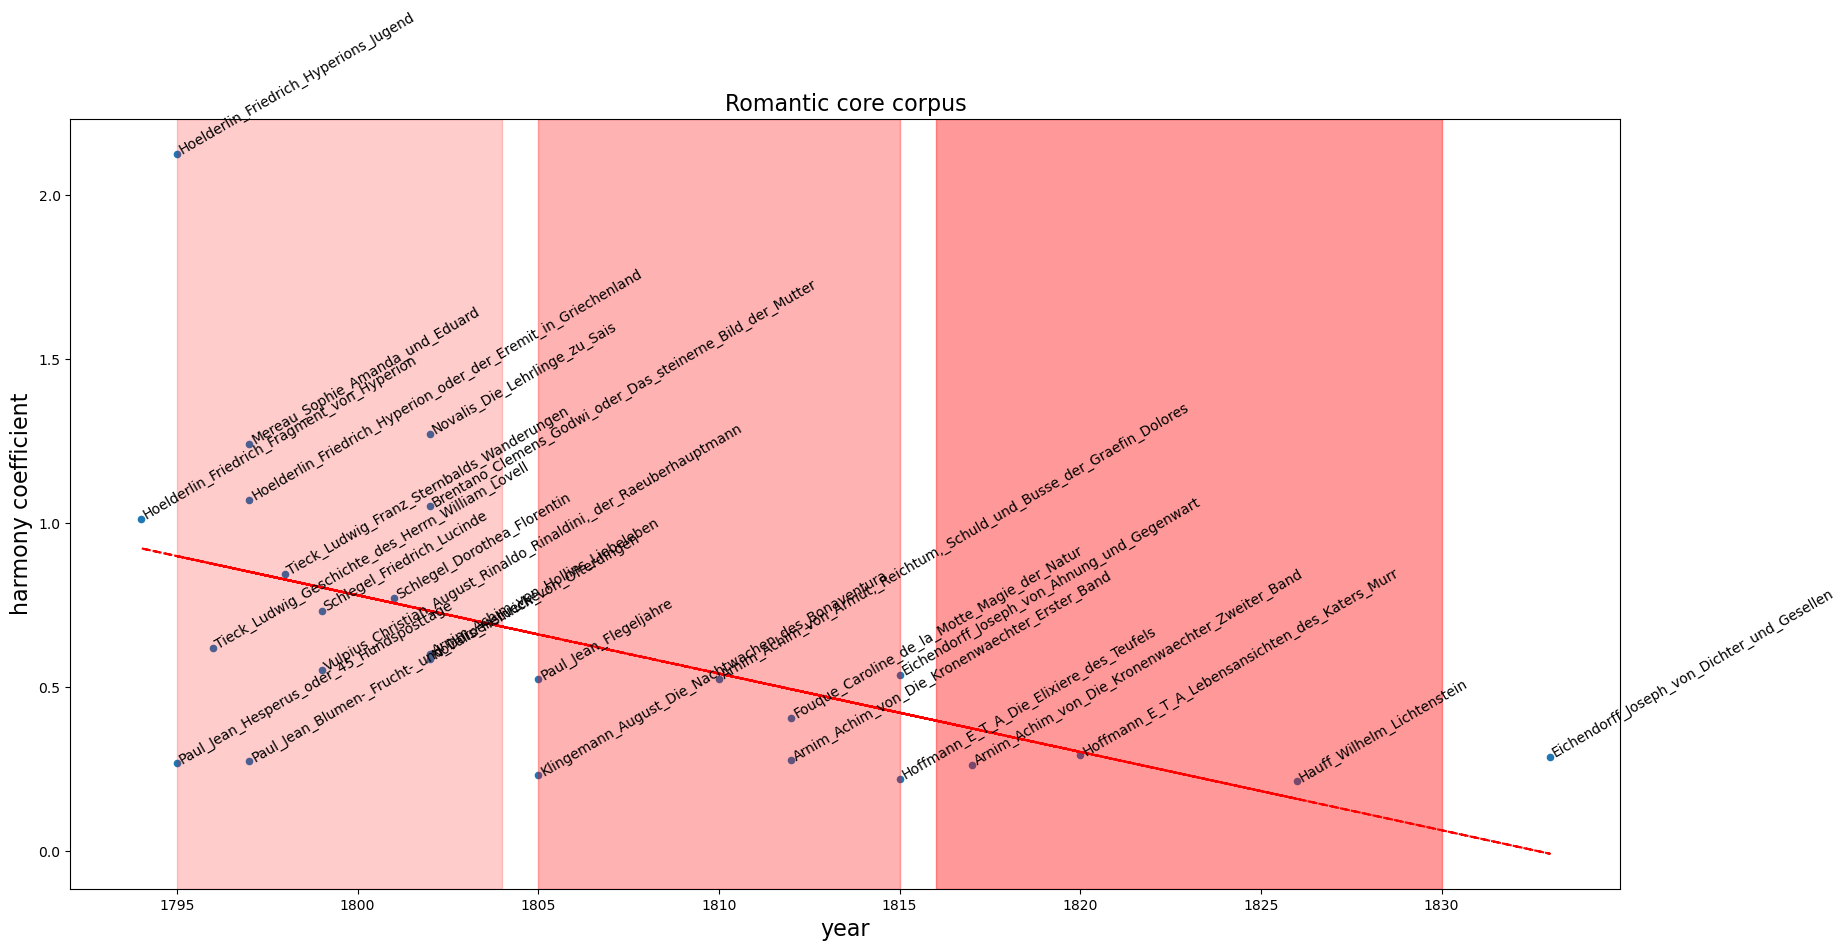

In [18]:
# plot harmony coefficient adjectives

fig, ax = plt.subplots()
df_novel_ranking_Romantik.plot(x='year', y='harmony_coefficient_adj', kind='scatter', ax=ax)
plt.rcParams["figure.figsize"] = [20, 10]

for idx, row in df_novel_ranking_Romantik.iterrows():
    ax.annotate(row['novel'], (row['year'], row['harmony_coefficient_adj']),rotation=30)

x = df_novel_ranking_Romantik['year']
y = df_novel_ranking_Romantik['harmony_coefficient_adj']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlabel('year', fontsize=16)
plt.ylabel('harmony coefficient', fontsize=16)

ax.axvspan(1795, 1804, alpha=0.2, color='red')
ax.axvspan(1805, 1815, alpha=0.3, color='red')
ax.axvspan(1816, 1830, alpha=0.4, color='red')

plt.title('Romantic core corpus', fontsize=16)

plt.show()

fig.savefig('../Analyseergebnisse/png/conflict_heuristic_DH_Romantik_core_harmony_coefficient_adj.png', dpi=300, bbox_inches = 'tight')

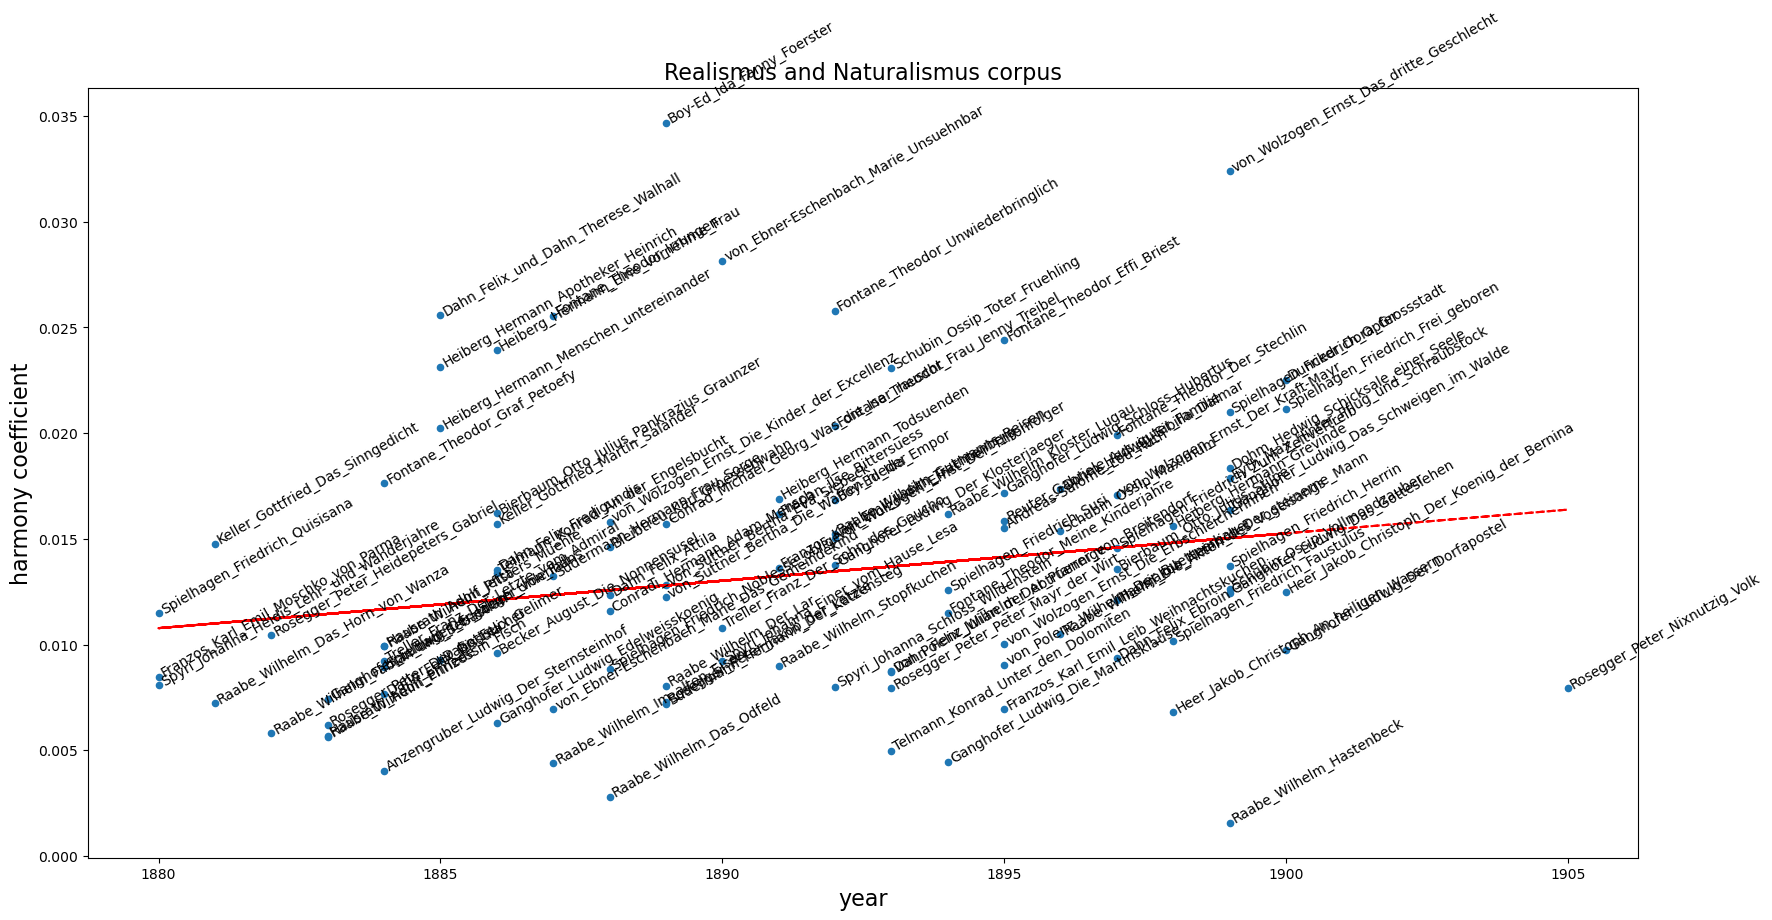

In [19]:
fig, ax = plt.subplots()
df_novel_ranking_Realismus_Naturalismus.plot(x='year', y='harmony_coefficient_adj', kind='scatter', ax=ax)
plt.rcParams["figure.figsize"] = [20, 10]

for idx, row in df_novel_ranking_Realismus_Naturalismus.iterrows():
    ax.annotate(row['novel'], (row['year'], row['harmony_coefficient_adj']),rotation=30)

x = df_novel_ranking_Realismus_Naturalismus['year']
y = df_novel_ranking_Realismus_Naturalismus['harmony_coefficient_adj']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlabel('year', fontsize=16)
plt.ylabel('harmony coefficient', fontsize=16)

plt.title('Realismus and Naturalismus corpus', fontsize=16)

plt.show()

fig.savefig('../Analyseergebnisse/png/conflict_heuristic_DH_Realismus_Naturalismus_harmony_coefficient_adj.png', dpi=300, bbox_inches = 'tight')

In [20]:
# plot conflict and harmony coefficient adjectives with short titles

titles_short = ['Arnim_Graefin_Dolores',
'Arnim_Kronenwaechter_1',
'Arnim_Kronenwaechter_2',
'Arnim_Liebeleben',
'Brentano_Godwi',
'Eichendorff_Ahnung',
'Eichendorff_Dichter',
'Fouque_Magie',
'Hauff_Lichtenstein',
'Hoelderlin_Fragment',
'Hoelderlin_Eremit',
'Hoelderin_Jugend',
'Hoffmann_Elixiere',
'Hoffmann_Murr',
'Klingemann_Bonaventura',
'Mereau_Amanda',
'Novalis_Lehrlinge',
'Novalis_Ofterdingen',
'Paul_Dornenstuecke',
'Paul_Flegeljahre',
'Paul_Hesperus',
'Schlegel_Florentin',
'Schlegel_Lucinde',
'Tieck_Wanderungen',
'Tieck_Lovell',
'Vulpius_Raeuberhauptmann']

In [21]:
df_novel_ranking_Romantik['novel'] = titles_short

In [22]:
df_novel_ranking_Romantik.head()

,novel,year,A_adj_abs,A_adj_rel,A_noun_abs,A_noun_rel,B_adj_abs,B_adj_rel,B_noun_abs,B_noun_rel,...,conf_dorn_bottom_abs,conf_dorn_bottom_rel,conf_anno_top_abs,conf_anno_top_rel,conf_anno_bottom_abs,conf_anno_bottom_rel,conf_coefficient_adj,conf_coefficient_noun,harmony_coefficient_adj,harmony_coefficient_noun
0,Arnim_Graefin_Dolores,1810,2163,0.122877,306,0.017383,27,0.001534,31,0.001761,...,3811,0.216497,64,0.003636,8734,0.496165,0.008017,0.001234,0.524796,6.230427
1,Arnim_Kronenwaechter_1,1812,974,0.088877,132,0.012045,24,0.002190,20,0.001825,...,1658,0.151291,76,0.006935,4571,0.417100,0.017173,0.002616,0.276391,4.105561
2,Arnim_Kronenwaechter_2,1817,887,0.089578,147,0.014845,24,0.002424,21,0.002121,...,1484,0.149869,88,0.008887,3655,0.369117,0.028983,0.005345,0.262573,3.681611
3,Arnim_Liebeleben,1802,441,0.159378,37,0.013372,3,0.001084,7,0.002530,...,578,0.208890,8,0.002891,1466,0.529816,0.013581,0.001346,0.599965,6.479617
4,Brentano_Godwi,1802,1845,0.122283,350,0.023197,24,0.001591,48,0.003181,...,3758,0.249072,50,0.003314,8143,0.539700,0.005958,0.001269,1.051304,6.690924


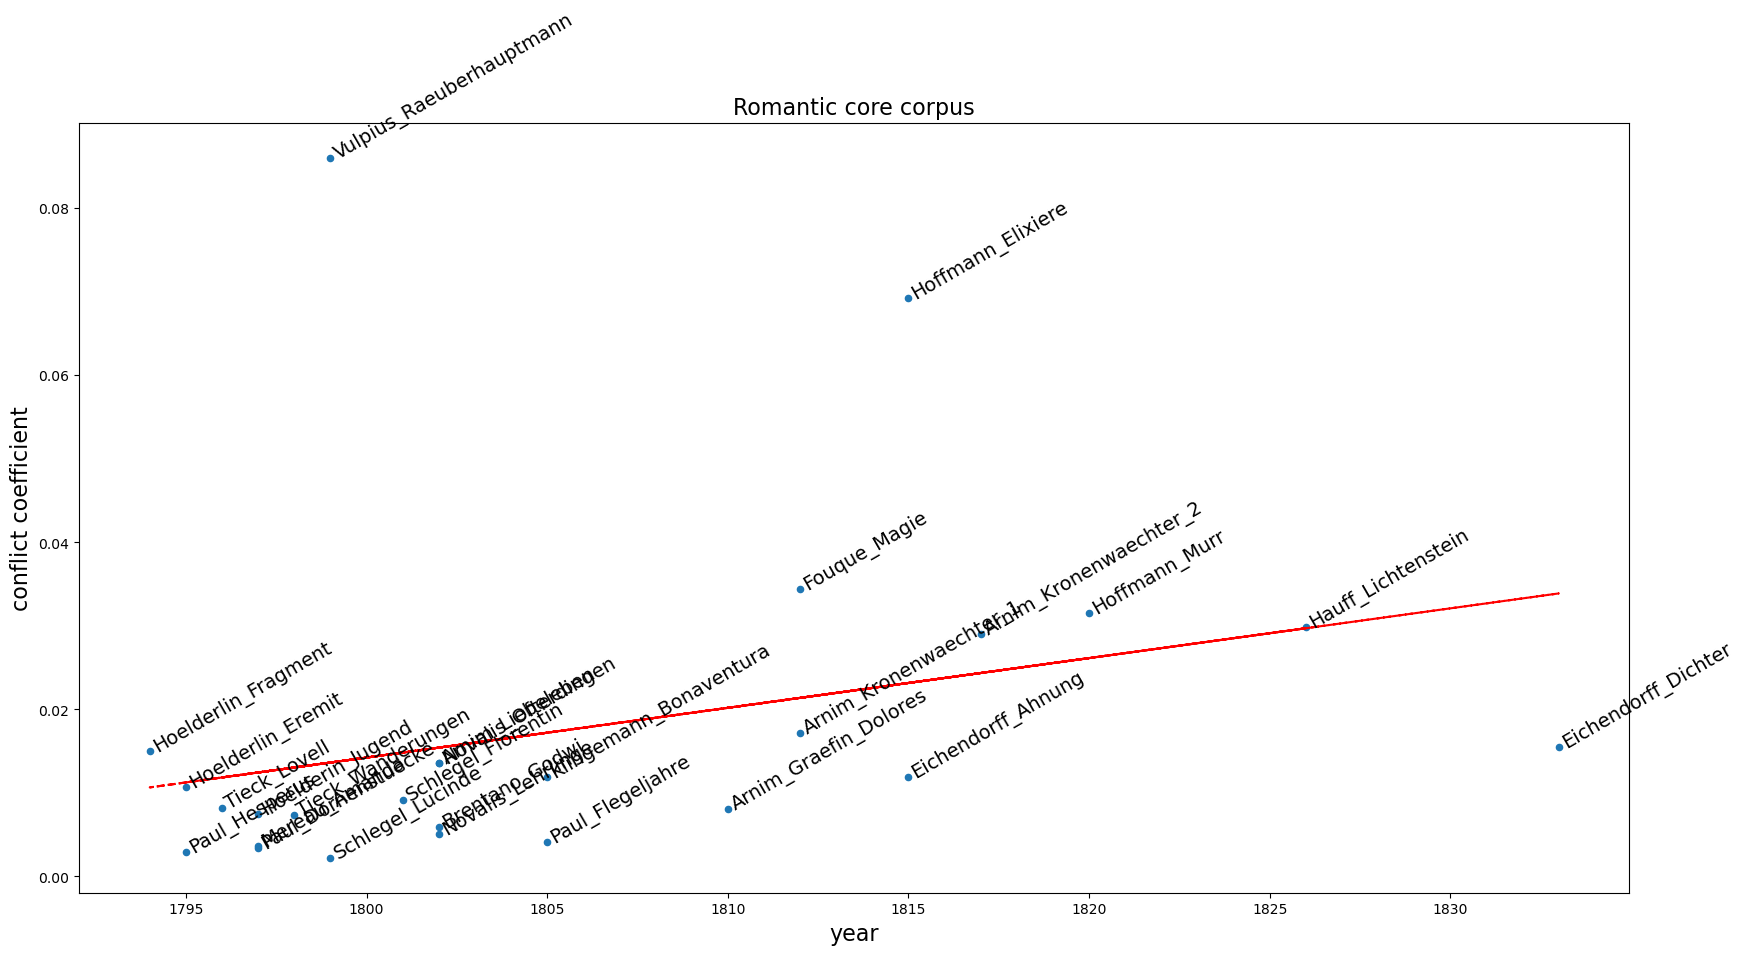

In [23]:
fig, ax = plt.subplots()
df_novel_ranking_Romantik.plot(x='year', y='conf_coefficient_adj', kind='scatter', ax=ax)
plt.rcParams["figure.figsize"] = [20, 10]

for idx, row in df_novel_ranking_Romantik.iterrows():
    ax.annotate(row['novel'], (row['year'], row['conf_coefficient_adj']),rotation=30, fontsize=14)

x = df_novel_ranking_Romantik['year']
y = df_novel_ranking_Romantik['conf_coefficient_adj']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlabel('year', fontsize=16)
plt.ylabel('conflict coefficient', fontsize=16)

plt.title('Romantic core corpus', fontsize=16)

plt.show()

fig.savefig('../Analyseergebnisse/png/conflict_heuristic_DH_Romantik_core_conf_coefficient_adj_short.png', dpi=300, bbox_inches = 'tight')

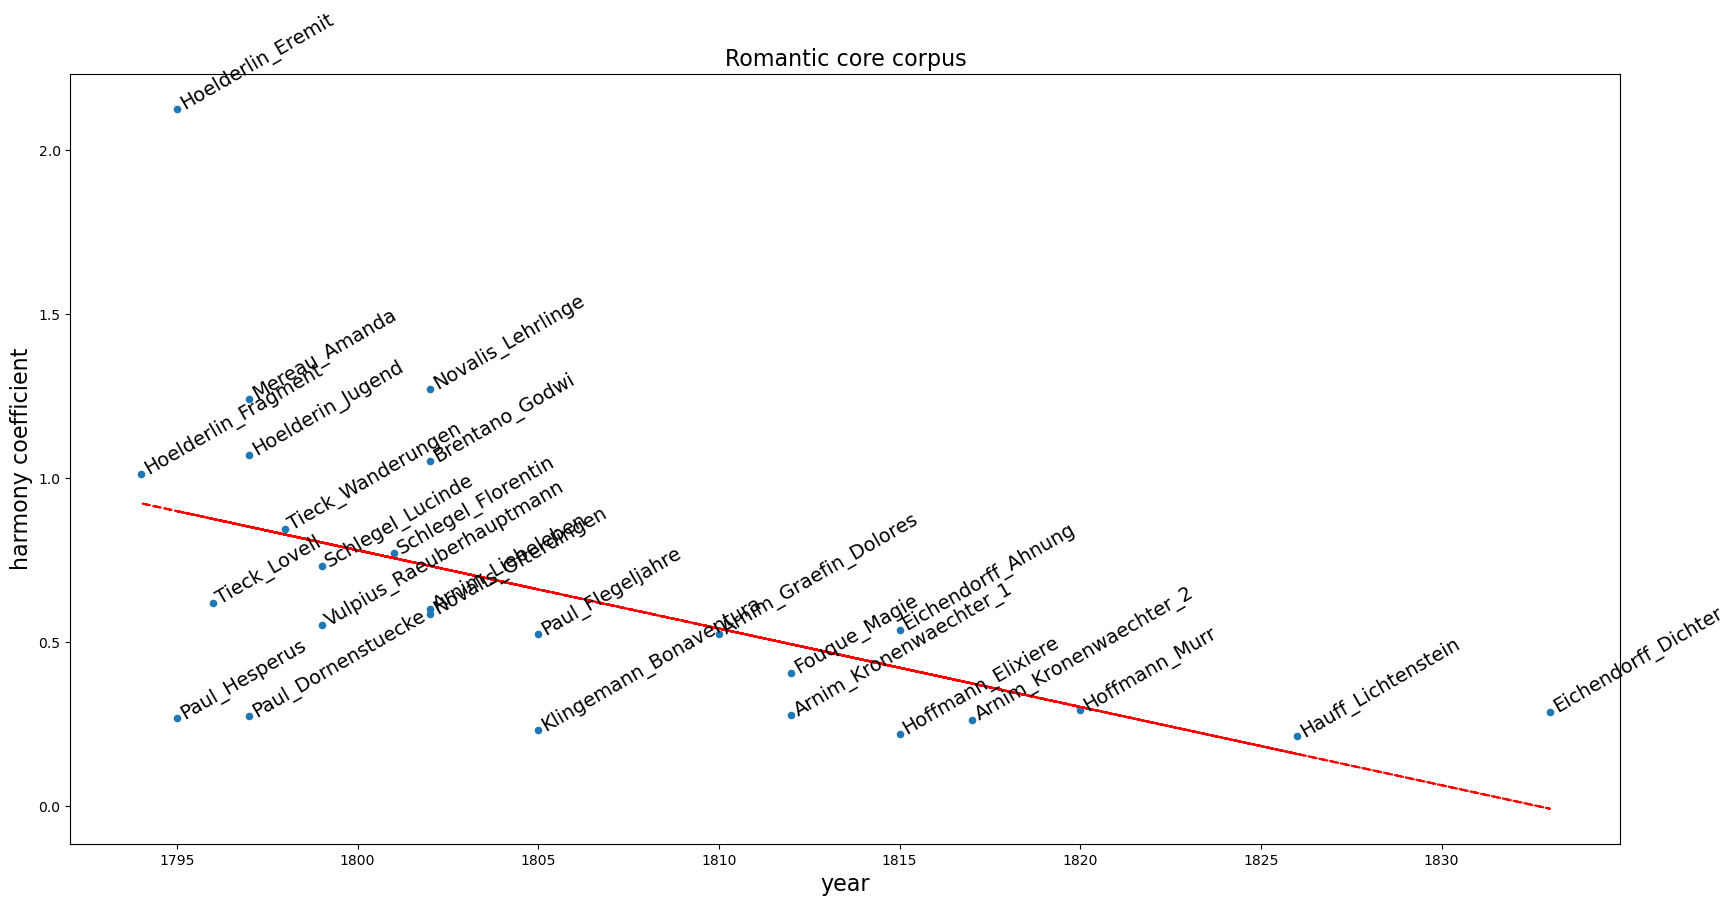

In [24]:
fig, ax = plt.subplots()
df_novel_ranking_Romantik.plot(x='year', y='harmony_coefficient_adj', kind='scatter', ax=ax)
plt.rcParams["figure.figsize"] = [20, 10]

for idx, row in df_novel_ranking_Romantik.iterrows():
    ax.annotate(row['novel'], (row['year'], row['harmony_coefficient_adj']),rotation=30, fontsize=14)

x = df_novel_ranking_Romantik['year']
y = df_novel_ranking_Romantik['harmony_coefficient_adj']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlabel('year', fontsize=16)
plt.ylabel('harmony coefficient', fontsize=16)

plt.title('Romantic core corpus', fontsize=16)

plt.show()

fig.savefig('../Analyseergebnisse/png/conflict_heuristic_DH_Romantik_core_harmony_coefficient_adj_short.png', dpi=300, bbox_inches = 'tight')

Ressources used:

https://stackoverflow.com/questions/41635448/how-can-i-draw-scatter-trend-line-on-matplot-python-pandas (last viewed: 10.07.2023)